### 4. 신경망 학습

* 데이터셋에만 지나치게 최적화된 상태 -> 과적합(overfitting)

#### 4.2 손실 함수

* 신경망 학습에서 사용하는 지표는 손실 함수가 학습이 잘 되었는지 평가하는 지표
    * MSE(Mean Squared Error) 평균 제곱 오차
    * Cross Entropy Error(교차 엔트로피 오차)

#### 4.2.1 평균 제곱 오차
* 가장 많이 쓰이는 손실 함수는 평균 제곱 오차

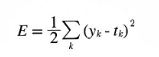

* y : predict한 값
* t : real(실체)값
* 1/2 : 수식을 깔끔하게 하기 위해
* E값 : 작을 수록 실제값과 비슷함을 의미 (작아지는 E값의 파라메터를 찾는 게 딥러닝의 목적)

In [1]:
import numpy as np

In [4]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

In [6]:
np.argmax(y)

2

* one - hot encoder 

In [11]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] 
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] #정답 -> 인코딩 방식 : 원핫인코더

In [12]:
def mean_squared_error(y, t):
    return np.sum((y - t) ** 2)/2

In [13]:
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [14]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] #잘못된 값을 넣었을 때

In [15]:
mean_squared_error(np.array(y), np.array(t))

0.5975

#### 4.2.2. 교차 엔트로피 오차

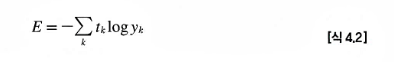

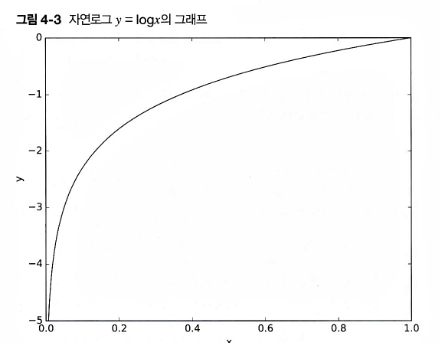

In [22]:
def cross_entropy_error(y, t): #y : 추론값, t : 실제값
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [20]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [23]:
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [25]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] #틀린값
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

#### 4.2.3 미니배치 학습

* 훈련 데이터에 대한 손실 함수의 값을 구하고, 그 값을 최대한 줄여주는 W(매개변수) 값을 찾는게 목적 
* 모든 훈련 데이터를 대상으로 손실 함수 값을 구해야하는데...... 
* mnist -> 6만개 6만개를 전부다 손실 함수 값들의 합을 지표로...

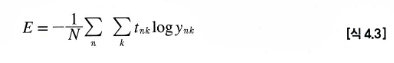

* 모든 데이터를 대상으로 손실 함수를 구할려면 시간이 많이 필요
* 데이터 일부를 추려 전체의 근사치로 이용
* 신경망에서 훈련 데이터로부터 일부 데이터만 골라서 학습 시키는 방법을 미니배치 
* 예) 6만장의 훈련 데이터 중에서 100장을 무작위로 뽑고 그 100장을 사용해서 학습하는 방식을 미니배치 학습

In [26]:
from dataset.mnist import load_mnist
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

In [27]:
print (x_train.shape)
print (t_train.shape)

(60000, 784)
(60000,)


In [28]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [29]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [32]:
t_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [33]:
train_size = x_train.shape[0]

In [34]:
train_size

60000

In [35]:
batch_size = 10

In [36]:
batch_mask = np.random.choice(train_size, batch_size)

In [37]:
batch_mask

array([ 1878,  5033, 48787,  7308,  5329,  6927,  1250, 20898, 40989,
       43627])

In [45]:
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [46]:
x_batch.shape

(10, 784)

In [47]:
t_batch.shape

(10, 10)

In [40]:
import os

In [41]:
os.getcwd()

'C:\\workspace'

os.chdir("c:/a")

In [48]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

cross_entropy_error(x_batch, t_batch)

* 신경망 학습에서는 최적의 매개변수(W,B, -> 가중치, 편향)를 탐색할 때 손실 함수의 값을 가능한 작게 하는 매개변수 값을 찾아가는과정
* 이때 매개변수의 미분을 계산하고, 그 미분 값을 근거로 매개변수의 값을 서서히 갱신하는 과정을 반복

* 정확도를 지표로 삼아서는 안되는 이유는 미분 값이 대부분의 장소에서 0이 되기 때문에 매개변수의 값을 갱신할수 없음

* 100장의 훈련 데이터 -> 32장을 정답을 맞쳤습니다. 
    * 정확도 32%
    * 매개변수의 값을 조금 변경해도 정확도의 변화는 없을 가능성이 매우 높아요...
    
* 손실함수를 사용하면 매개변수의 값을 조금만 변경해도 손실함수의 값이 변경이 되기 때문에 손실함수를 지표로 사용

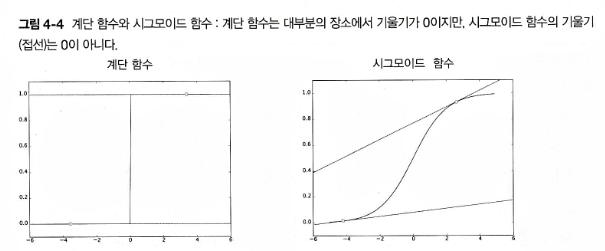

### 4.3 수치 미분

* 경사법에서는 기울기(미분의 값)을 기준으로 나아갈 방향을 정합니다.

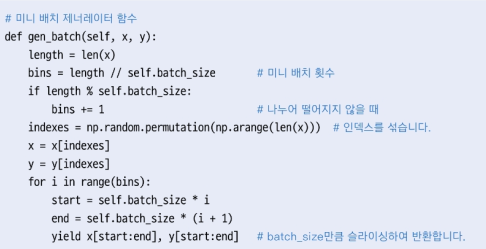